# Modelagem e Simulação

Recursos computacionais são usados em diversas áreas da Ciência para a realização de simulações de sistemas, objetos, fenômenos.

Para a realização de uma simulação, precisamos de um modelo para o objeto de interesse.

**Exemplo:**  Descrição de um sistema de apostas (jogo de azar)





# Jogo de azar - duas possibilidades

Considere um **jogo de azar** com o seguinte formato:
- O jogador escolhe o valor da aposta e escolhe um número (1 ou 2).
- Em seguida, é sorteado um número (1 ou 2).
- Se o jogador acertar ele tem como lucro o valor de sua aposta.
- Caso contrário, ele perde o valor apostado.

Considere um jogador que utiliza a seguinte estratégia:
- Ele sempre aposta no número 1.
- O valor da aposta é sempre 20 reais.
- Ele tem 100 reais disponíveis inicialmente.
- Ele irá parar quando obtiver 100 reais de lucro (ou seja, ficar com o valor acumulado de 200 reais) ou quando o dinheiro dele acabar.

> Será que é uma boa estratégia?

## Modelo

Um **modelo** é uma representação (parcial) do objeto de interesse.

No nosso exemplo, um possível modelo seria considerar que, em cada rodada,
* Com probabilidade $p$, o número 1 é escolhido. Caso contrário, o número 2 é escolhido.
* Cada rodada é feita independentemente das demais.

Note que, ao escolher este modelo, estamos considerando que o jogo é honesto (não há interferência para fazer o jogador perder). Além disso, assumir que cada rodada é independente é uma suposição importante (pois isso depende de como o sorteio é realizado).

> O nosso modelo é bom?

## Simulação Computacional


 Procuramos usar simulações computacionais para descobrir características do objeto investigado.

Vamos ver como simular o modelo do nosso exemplo.



**Em cada rodada, é realizado um sorteio. Então importamos a biblioteca ``random`` que contém várias funções para realizar diversos tipos de sorteios (random significa aleatório)**.

In [2]:
import random as rd  # importamos a biblioteca random que contém várias funções para realizar diversos tipos de sorteios

Vamos inicializar o saldo do jogador como $100$ e o valor da aposta como $20$:

In [ ]:
saldo = 100
aposta = 20

Para realizar um sorteio entre os números 1 e 2, podemos utilizar a **função ``randint(a,b)``**.

**Essa função escolhe um número entre $a$ e $b$ (com $a$ e $b$ inclusos)**. **Cada número tem a mesma chance de ser sorteado.**

Então se realizamos um sorteio entre  dois números, 1 e 2, estamos considerando probabilidade $p=1/2$. Ou seja,
o número 1 é escolhido com probabilidade 1/2 (ou seja, 50%) e 2 é escolhido com probabilidade 1/2 (ou seja, 50%).

**Execute a célula abaixo várias vezes para ver que ela vai sorteando ou número  1 ou número 2:**

In [ ]:
sorteio = rd.randint(1,2)   #sorteio entre números 1 e 2. Número 1 é escolhido com probabilidade 1/2 (ou seja, 50%). Número 2 também com 50%
print(sorteio)

Após o sorteio, atualizamos o ``saldo``:

In [ ]:
if sorteio == 1:                     # o jogador sempre aposta no numero 1. Logo, se o numero 1 for sorteado, ele ganha o valor de aposta
  saldo = saldo+aposta
  print("Ganhou",aposta,"reais")
else:                                # Caso contrario, ele perde o valor apostado
  saldo = saldo-aposta
  print("Perdeu",aposta,"reais")
print("O jogador tem",saldo,"reais") # note que print esta fora de if/else

**Para adicionar o fato de que o jogador joga até atingir 200 reais ou perder todo o seu dinheiro, utilizamos laço `while`**.

A condição do `while` será

```
 saldo > 0 and saldo < 200
```
pois o `while` acaba se o saldo ficar menor ou igual à $0$ (jogador perdeu todo dinheiro) ou maior ou igual à $200$ (jogador atingiu 200 reais).

**Logo, o jogo de azar completo fica como segue. Execute o código abaixo várias vezes para ver que a saída vai ser diferente, pois a saída depende de sorteio feito na linha 4:**

In [ ]:
saldo = 100                          # inicializamos saldo
aposta = 20                          # inicializamos aposta

while saldo > 0 and saldo < 200:     # while acaba se o saldo ficar menor ou igual à 0 (jogador perdeu tudo)ou maior ou igual à 200 (jogador atingiu 200 reais).
  sorteio = rd.randint(1,2)             # sorteio entre 1 e 2 (dentro de while)
  if sorteio == 1:                      # o jogador sempre aposta no numero 1. Logo, se o numero 1 for sorteado, ele ganha o valor de aposta
    saldo = saldo+aposta
    print("Ganhou",aposta,"reais")
  else:                                 # Caso contrario, ele perde o valor apostado
    saldo = saldo-aposta
    print("Perdeu",aposta,"reais")
print("O jogador tem",saldo,"reais") # imprimimos saldo, apos sair de laco while

## Gráfico

É muito útil podermos visualizar o que está acontecendo usando um gráfico.

**Vamos criar uma variável ``rodada`` para contar o número de rodadas e vamos colocar um '.', onde a coordenada x tem o número da rodada e a coordenada y tem o saldo após a execução da rodada.**

Para a rodada $x=0$, o valor de y é o saldo inicial (no nosso caso, 100).

**Execute várias vezes e veja como é fácil de ver a trajetória do jogador.**

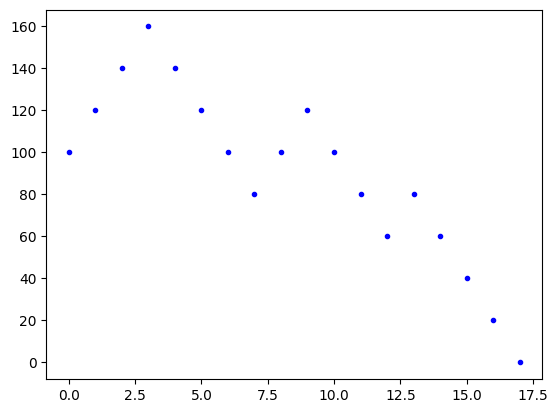

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

saldo = 100
aposta = 20
rodada  = 0 # inicializamos rodada com zero antes de laco while
plt.plot(rodada, saldo,'.b')

while saldo>0 and saldo<200:
  sorteio = rd.randint(1,2)
  if sorteio == 1:
    saldo = saldo+aposta
  else:
    saldo = saldo-aposta
  rodada = rodada+1            # atualizamos rodada
  plt.plot(rodada, saldo,'.b') # imprimimos o ponto - ultimo comando dentro do laco  while

> Mas como saber se a estratégia é boa ou ruim?

Você deve ter reparado que às vezes o jogador prospera e acumula os 200 reais desejados. Em outras vezes, ele simplesmente vai à falência.



## Simulando n jogadas

**Podemos simular a trajetória do jogador várias vezes e contar quando ele prosperou e quando ele faliu.**

**Basta verificar se while acabou pois o saldo ficou menor ou igual à zero, ou se chegou a $200$**.

**Usamos uma variável ``faliu`` para contar o número de vezes que o jogador faliu e uma variável ``prosperou`` para contar o número de vezes que ele prosperou**.

**Vamos simular 1000 vezes o jogo completo:**

In [3]:
faliu = 0                            # inicializamos faliu com 0 no inicio de programa
prosperou = 0                        # e o prosperou tambem

for i in range(0,1000):              # iremos simular 1000 vezes o jogo completo (em cada passagem de for iremos simular um jogo completo)
  saldo = 100                              # no inicio de cada jogo inicializamos saldo com 100
  aposta = 20                              # e aposta com 20
  while saldo > 0 and saldo < 200:
    sorteio = rd.randint(1,2)
    if sorteio == 1:
      saldo = saldo+aposta
    else:
      saldo = saldo-aposta
  if saldo<=0:                             # se saimos de laco while e o saldo ficou <= 0, entao aumentamos o contador faliu por 1
    faliu = faliu+1
  else:                                    # se saimos de laco while e o saldo ficou >= 200, entao aumentamos o contador prosperou por 1
    prosperou = prosperou+1

print("O jogador faliu",faliu,"vezes") # imprimimos resultados fora de laco for, ou seja, apos terminar 1000 simulacoes de jogo
print("O jogador prosperou",prosperou,"vezes")

O jogador faliu 487 vezes
O jogador prosperou 513 vezes


Rode o código acima várias vezes.

> Qual conclusão você consegue tirar sobre a estratégia?

**Como você pode ver, os resultados são bem balanceados.**

Na verdade, é possível provar matematicamente que, neste caso, a probabilidade do jogador falir é 1/2 e a de prosperar é 1/2.



## Jogo de azar - três possibilidades
Mas e se, ao invés do jogo sortear entre 1 e 2, o sorteio for entre 1, 2 e 3 (com a mesma chance para cada número)?

Basta acrescentarmos o número 3 na nossa lista:

In [ ]:
faliu = 0
prosperou = 0

for i in range(0,1000):
  saldo = 100
  aposta = 20
  while saldo > 0 and saldo < 200:
    sorteio = rd.randint(1,3)  # sorteio entre 1, 2 e 3, com a mesma probabilidade de cada um
    if sorteio == 1:
      saldo = saldo+aposta
    else:
      saldo = saldo-aposta
  if saldo<=0:
    faliu = faliu+1
  else:
    prosperou = prosperou+1

print("O jogador faliu",faliu,"vezes")
print("O jogador prosperou",prosperou,"vezes")

Note que isso altera drasticamente as chances de falir e prosperar. Isso porque o jogador tem uma chance muito menor de ganhar cada sorteio agora.

<hr>

# Números aleatórios e comandos: rd.seed() e rd.choice()

Como você deve ter percebido, poder fazer os sorteios foi muito importante em nosso exemplo.


Na verdade, o computador não consegue sortear números que são verdadeiramente aleatórios. Ele sorteia o que chamamos de números *pseudo-aleatórios*, que têm um comportamento que tenta ser similar ao aleatório.

Um dos fatores que vários métodos usam para sortear números pseudo-aleatórios é o horário do computador.

O horário é usado em uma variável chamada de **`seed`** **(semente)** **que basicamente determina os valores que serão sorteados. Então, se fixamos a seed, obtemos sempre os mesmos resultados**.

Execute a célula abaixo para ver que **a saída sempre fica igual** - **a seed (semente) foi definida como 0:**


In [ ]:
rd.seed(0)     # seed (semente) foi definida como 0
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))

**Mudando o valor do seed, muda o sorteio**:

In [ ]:
rd.seed(1)    # seed foi definida como 1
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))

Vamos ver algumas opções de sorteio.

Para **gerar um número real entre 0 e 1 onde cada número tem a mesma chance de ser sorteado, usamos a função ``random()``:**

In [ ]:
rd.random()

Podemos fazer também um **sorteio de um elemento de uma lista. Cada elemento da lista tem a mesma chance de ser sorteado**. Note o uso de colchetes `[` e `]`.

In [ ]:
rd.choice([1,4,5])

Então, se você quiser simular um sorteio de cara ou coroa, você poderia fazer assim:

In [ ]:
rd.choice(["cara", "coroa"])

Todos os exemplos que vimos até agora atribuem a mesma chance para cada possibilidade.

E se quisermos fazer uma moeda onde a chance de sair cara é 0.4 (ou seja, 40%) e a de sair coroa é 0.6 (ou seja, 60%).

Podemos utilizar a **função ``choices`` que recebe as chances de cada possibilidade**.

In [ ]:
rd.choices(["cara","coroa"],weights=[.4,.6],k=1)


Essa função foi feita com a **possibilidade de realizar vários sorteios de uma vez, isso é controlado pela opção $k$**. Veja como fazer **5 sorteios de uma só vez**:

In [ ]:
rd.choices(["cara","coroa"],weights=[.4,.6],k=5)  # k=5

A função sempre retorna uma lista (por isso os ``[`` e ``]``).

Se você for fazer apenas um sorteio e guardar em uma variável s (sem lidar com listas), você poderia fazer assim:

In [ ]:
[s] = rd.choices(["cara","coroa"],weights=[.4,.6],k=1)
s

Uma outra opção seria a seguinte.

 Comece sorteando um valor ``r`` entre 0 e 1.

Dados valores $a$ e $b$, a chance de ``r`` cair dentro do intervalo $[a,b)$ é o comprimento do intervalo!

Então, a chance de r ser menor do que 0.4 é o comprimento de $[0,0.4)$ que é 0.4 (ou seja 40% de chance):

In [ ]:
p = 0.4
r = rd.random()
if p < 0.4:
  s = "cara"
else:
  s = "coroa"
print(s)

<hr>

# Simulando o valor de $\pi$ através de sorteios

No colégio, todos aprendemos a usar a constante $\pi$ em Geometria para calcular a área de figuras geométricas, por exemplo. Aprendemos, também, que o valor da constante é de 3,1415926535... Nosso objetivo aqui é utilizar um modelo matemático simples para aproximar o valor de $\pi$ (ou seja, simular os valores de $\pi$ através de sorteios).

Vamos usar o método de Monte Carlo, que se baseia nas propriedades dos números aleatórios.

>**Observação:** No link https://www.youtube.com/watch?v=ELetCV_wX_c pode ser visualizada uma animação de simulação de valor $\pi$, que pode facilitar o entendimento desta parte de Notebook.
>
> Outra boa animação pode ser encontrada em https://engaging-data.com/estimating-pi/ (clique no botão `start/stop` posicionado no lado esquerdo superior da janela). Observe como mudam os dados abaixo do botão, por exemplo, alguns dos valores:

>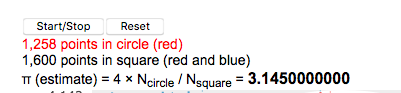

Para compreender o uso do método de Monte Carlo no cálculo de $\pi$, vamos primeiro desenvolver algumas relações geométricas que nos levarão a uma equação para o valor da constante $\pi$.


Sabemos que a área de uma circunferência de raio $r = 1/2$ é

$$A_{circ} = \pi r^2 = \pi/4$$

Sabemos, ainda, que a área de um quadrado de lado $l=1$ é dada pela

$$A_{quad} = l^2 = 1$$

Veja que podemos colocar esta circunferência inscrita no quadrado, pois o diâmetro da circunferência é $2r = 1$ e o lado do quadrado também é 1:

<img src="https://blog.professorferretto.com.br/wp-content/uploads/2019/08/raio-da-circunferencia-inscrita-no-quadrado.png" width="300" height="300">

A razão entre a área da circunferência e a área do quadrado é

$$\frac{A_{circ}}{A_{quad}} = \frac{\pi}{4}$$

Ou seja,

$$ \pi = 4\frac{A_{circ}}{A_{quad}} $$

Suponha que sorteamos vários pontos no quadrado aleatoriamente.

Para cada ponto, a coordenada x é sorteada entre 0 e 1 (com as mesmas chances para todos os números) e o mesmo vale para a coordenada y:

<img src="https://www.researchgate.net/profile/Yiqun_Chen19/publication/341965356/figure/fig2/AS:899322442964993@1591426587361/Visualization-of-the-Monte-Carlo-approximation-of-Pi-p-i-i-i-i-ii-i-ii.ppm">

> Qual a probabilidade de cada ponto cair dentro da área do círculo?

Ela é

$$p = \frac{A_{circ}}{A_{quad}}$$

> E como vamos estimar probabilidade $p$?

Com a simulação!

Se sortearmos $n$ pontos e $n_{circ}$ pontos caírem dentro do círculo, então
$\frac{n_{circ}}{n}$ tem grandes chances de ser muito próximo de $p$ (se escolhermos $n$ grande)

Então reveja nossas contas:

$$ \pi = 4\frac{A_{circ}}{A_{quad}} = 4p \approx
4\frac{n_{circ}}{n} $$

Ou seja

**$$ \pi \approx 4\frac{n_{circ}}{n}$$**

**Vamos usar esta última formula: $\pi$ é aproximadamente 4 vezes numero de pontos dentro de círculo dividido por  número total de pontos.**

> Vamos ver se dá certo!




**Primeiro veja como sortearmos $n$ pontos:**

In [4]:
n = 10               # neste caso n eh 10
for i in range(0,n): # sorteamos n=10 pontos (1 ponto em cada rodada de for)
  x = rd.random()       # sorteamos ponto x em intervalo [0,1]
  y = rd.random()       # sorteamos ponto y em intervalo [0,1]
  print(x,y)            #impriminos ponto x,y

0.8035036293823524 0.6846690708974152
0.13005092602651147 0.8014158204307613
0.9467105616690608 0.28264344725559387
0.036572979783449755 0.9502800943606448
0.6603426538128098 0.06569867314424038
0.46119449660207823 0.7155564860059005
0.5616634568239963 0.9895758945753703
0.6124785900890207 0.08210436092987294
0.56494513387346 0.5734953842419636
0.3856874194520672 0.3890425093840554


**Como saber se um ponto $(x,y)$ está dentro do círculo**:

O círculo tem centro $(0.5, 0.5)$ e o raio é $0.5$. Então $(x,y)$ se encontra dentro do círculo se a distância de $(x,y)$ para $(0.5, 0.5)$ é no máximo 0.5.

A distância de $(x,y)$ para $(0.5, 0.5)$ é dada pela fórmula:
$$\sqrt{(x-0.5)^2 + (y-0.5)^2}.$$

**Então, se**
$$\sqrt{(x-0.5)^2 + (y-0.5)^2} \leq 0.5$$
**o ponto $(x,y)$ está dentro do círculo. Caso contrário, está fora.**

**O seguinte algoritmo imprime 10 pontos aleatórios, e para cada um imprime se está dentro ou fora de círculo**.

In [ ]:
n = 10
for i in range(0,n): # sorteamos n=10 pontos (1 ponto em cada rodada de laco)
  x = rd.random()
  y = rd.random()
  print(x,y)
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5  # dist calcula a distancia entre o ponto (x,y) e centro de circulo
  if dist <= 0.5:                        # se dist <= 0.5, entao o ponto esta dentro de circulo
    print("Dentro de circulo\n")            # lembre-se que o caractere \n serve para quebra de linha (pula para proxima linha).
  else:                                  # se dist > 0.5, entao o ponto esta fora de circulo
    print("Fora de circulo\n")

Agora **vamos criar uma variável `ncirc` para contar quantos pontos estão dentro do círculo:**

In [ ]:
n = 10
ncirc = 0        # inicializamos ncirc por 0 no inicio de programa. ncirc vai contar o numero de pontos dentro de circulo

for i in range(0,n):  # sorteamos 10 pontos (1 ponto em cada rodada de laco for)
  x = rd.random()
  y = rd.random()
  print(x,y)
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
  if dist <= 0.5:
    print("Dentro\n")
    ncirc = ncirc + 1     # o pronto (x,y) esta dentro de circulo, portanto aumentamos contador ncirc por 1
  else:
    print("Fora\n")

print("Número de pontos dentro do círculo:",ncirc) # fazemos impressao de resultado fora de laco for (apos sortear 10 pontos)
print("Número total de pontos:",n)
p_est = ncirc/n  # p_est eh numero de pontos dentro de circulo (ncirc) dividido por  numero total de pontos (n)
pi_est = 4*p_est # estimativa para pi eh 4*p_est (4 vezes numero de pontos dentro de circulo dividido por  numero total de pontos)
print("Estimativa para p (probabilidade)",p_est)
print("Estimativa para pi",pi_est)

## Repetindo 100 vezes

> Quão boa é a nossa aproximação para $\pi$?

Vamos importar a biblioteca `math` para verificar (precisamos de biblioteca `math` para comparar a diferenca entre o valor exato de pi que é `math.pi` com a nossa estimativa/aproximação).

Vamos rodar com n=100. Tiramos os prints de dentro do for, pois fica difícil de ler.


In [19]:
import math
n = 100 # agora n eh 100
ncirc = 0
for i in range(0,n):  # repetimos n=100 vezes, ou seja, sorteamos 100 pontos (um ponto em cada rodada de laco)
  x = rd.random()
  y = rd.random()
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
  if dist < 0.5:
    ncirc = ncirc + 1

print("Número de pontos dentro do círculo:",ncirc) # imprimimos resultados fora de for, ou seja, apos 100 rodadas (em cada rodada escolhemos um ponto aleatoreo)
print("Número total de pontos:",n)
p_est = ncirc/n
pi_est = 4*p_est
print("Estimativa para p (probabilidade)",p_est)
print("Estimativa para pi",pi_est)
print("Erro", abs(math.pi - pi_est))  # imprmimos o Erro, que eh valor absoluto de diferenca entre o valor exato de pi (math.pi) e a nossa estimativa (pi_est)

Número de pontos dentro do círculo: 77
Número total de pontos: 100
Estimativa para p (probabilidade) 0.77
Estimativa para pi 3.08
Erro 0.061592653589793045


Rode a célula aacima várias vezes para ver o que acontece.

Como você pode ver, o quão boa fica a estimativa varia bastante.



## Repetindo n vezes

Vamos fazer uma comparação para os valores de $n$: 10,100,1000,10000,50000,100000.

In [ ]:
import math

valores = [10,100,1000,10000,50000,100000,100000]  # valores eh uma lista com numeros 10, 100, 1000, etc

for n in valores: # laco EXTERNO: na primeira rodada de laco externo, n eh 10; na segunda rodada, n eh 100, etc
  ncirc = 0            # inicializamos ncirc com 0 ates de comecar o jogo numa certa rodada de laco
  for i in range(0,n): # laco INTERNO: repetimos n vezes, ié, sorteamos n pontos, para cada valor de n no laco externo: primeiro n eh 10; depois n eh 100, etc
    x = rd.random()
    y = rd.random()
    dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
    if dist < 0.5:
      ncirc = ncirc + 1

  # imprimimos resultado e erro apos 10 rodadas, apos 100 rodadas....apos 100000 rodadas
  # note que esta parte fica fora de bloco de laco INTERNO, e dentro de bloco de laco EXTERNO
  print("Número de pontos dentro do círculo:",ncirc)
  print("Número total de pontos:",n)
  p_est = ncirc/n
  pi_est = 4*p_est
  print("Estimativa para p",p_est)
  print("Estimativa para pi",pi_est)
  print("Erro", abs(math.pi - pi_est))
  print() # imprimimos linha vazia


**Note como a estimativa para $\pi$ tende a melhorar (e erro diminuir) quando AUMENTAMOS $n$.**

Logo, a simulação deu certo.

## Exercício 1

Faça uma simulação com 50 repetições, com 100 pontos sorteados a cada repetição. Calcule a média de erro (onde erro é valor absoluto de diferença entre o valor exato de $\pi$ e a nossa estimativa obtida para $\pi$ em cada repetição de jogo).



In [29]:
import numpy as np
erros = []
for n in range(0,50):
    ncirc = 0
    for i in range (0,100):
        x = rd.random()
        y = rd.random()
        dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
        if dist < 0.5:
            ncirc = ncirc + 1
    p_est = ncirc/100
    pi_est = 4*p_est
    erro = abs(math.pi - pi_est)
    erros.append(erro)
    media = np.mean(erros)
print(media)




0.11100888156922484


## Exercício 2

Na simulação do jogo de azar, compare as seguintes estratégias de aposta:
1. Estratégia 1: O jogador aposta sempre 20 reais;
2. Estratégia 2: Se o jogador tem menos do que 100 reais, ele aposta todo seu dinheiro. Caso possua mais do que 100 reais, ele aposta a quantidade necessária para chegar em 200. Por exemplo, se ele possui 10 reais, ele apostará 10 reais. Se ele possui 120 reais, ele apostará 80 reais.

Use a semente 0 para ambas as simulações e probabilidade $p=0.4$ para ganhar. Repita cada simulação 1000 vezes. Calcule a quantidade de vezes que o jogador prosperou. Qual a melhor estratégia? 